# 7、在 scikit-learn 中使用逻辑回归处理非线性分类问题必须正则化

+ 我的天哪，为了说清楚本节在干什么，我写了这么长的一个标题。

我们首先制造一些数据，让这些数据的决策边界类似抛物线的形状。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:, 0]**2 + X[:, 1]) < 1.5, dtype='int')
# 随机分错一些点，制造一些噪音
for _ in range(20):
    y[np.random.randint(200)] = 1

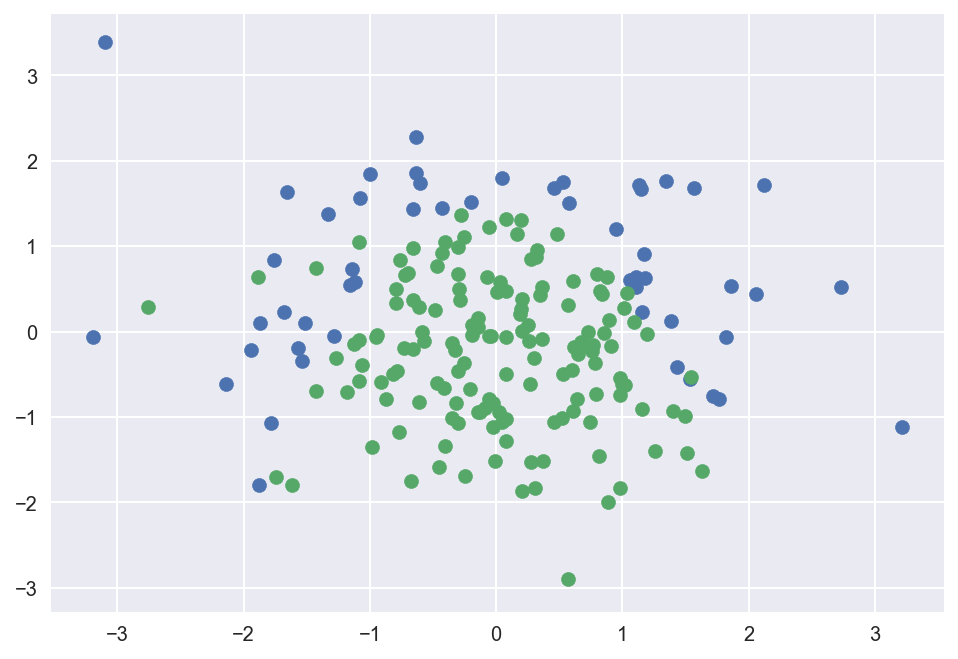

In [2]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

## 在 scikit-learn 中使用逻辑回归



In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [6]:
log_reg.score(X_test, y_test)

0.86

In [7]:
def plot_decision_boundary(model, axis):

    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int(
            (axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int(
            (axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

## 默认的逻辑回归只能绘制线性决策边界

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


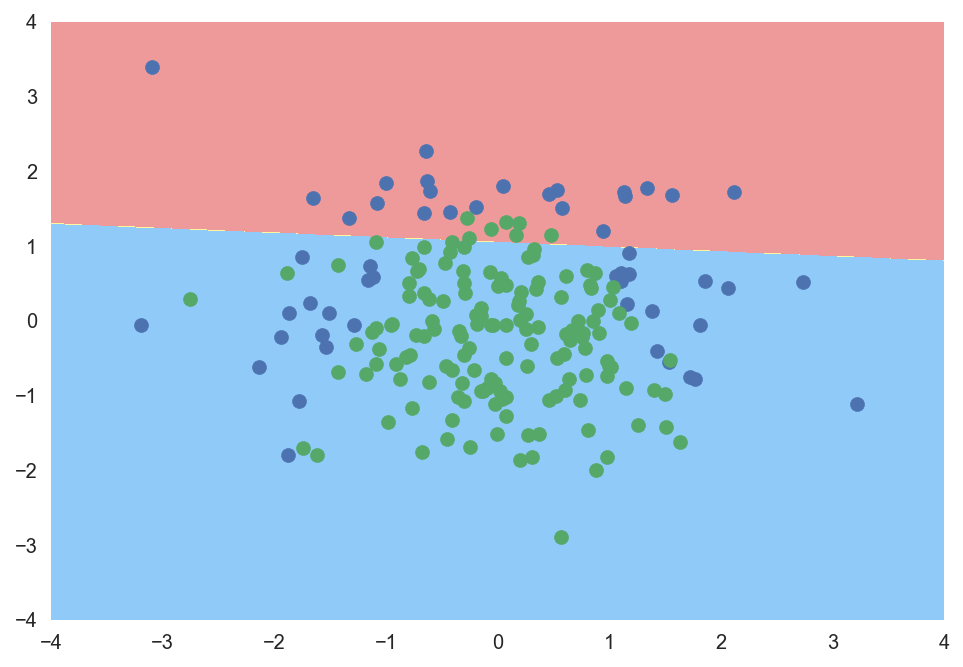

In [8]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

可以看到，如果不是线性可分的数据，直接使用逻辑回归，泛化能力并不好，所以我们要加上多项式回归，并且加上正则化项。

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 这里的 LogisticRegression 是 scikit-learn 中带的


def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

## 使用了 2 次多项式特征，绘制决策边界（没有正则化）

In [10]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [11]:
poly_log_reg.score(X_train, y_train)

0.9133333333333333

In [12]:
poly_log_reg.score(X_test, y_test)

0.94

发现效果不错了。我们再看看逻辑回归的决策边界。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


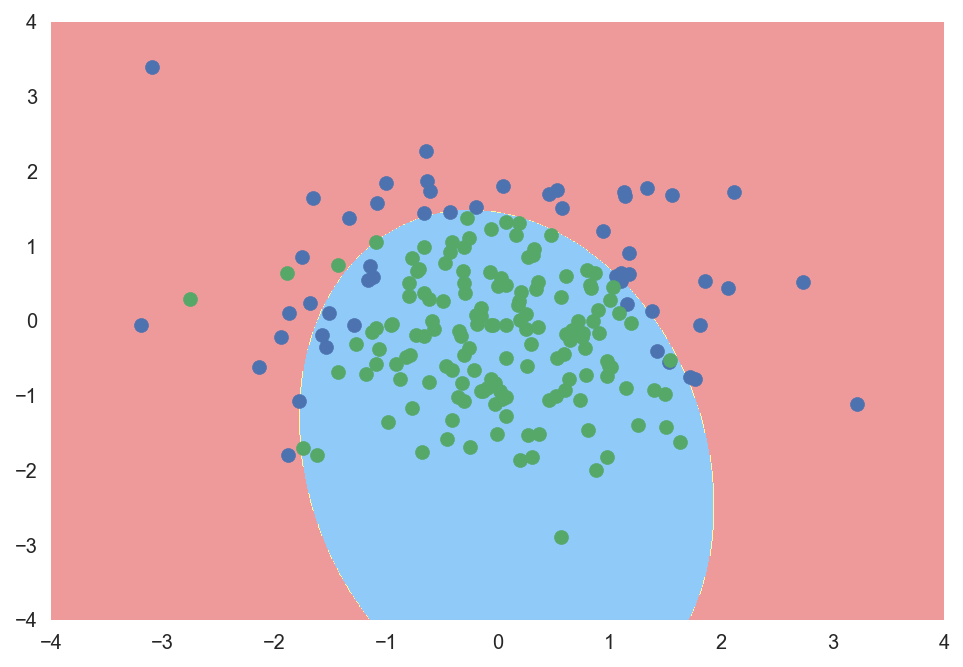

In [13]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

## 使用了 20 次多项式特征，绘制决策边界（没有正则化）

下面，我们提高一下 degree，让模型变得复杂一些。

In [14]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [15]:
poly_log_reg2.score(X_train, y_train)

0.94

In [16]:
poly_log_reg2.score(X_test, y_test)

0.92

## 下面这张图就说明过拟合出现了

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


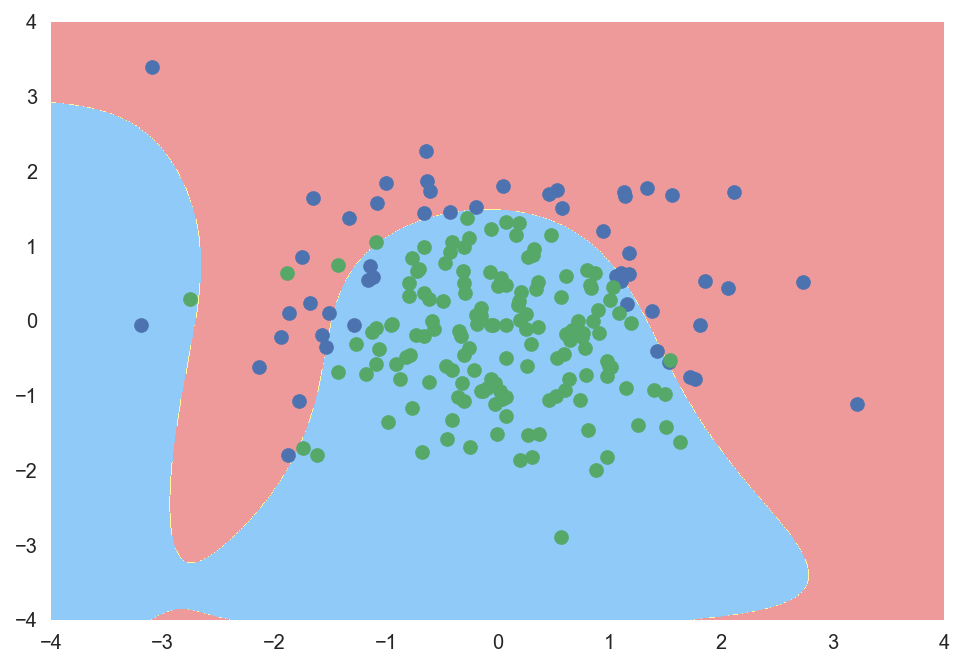

In [17]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

可以看到，训练数据集的 score 提升了，但是测试数据集的 score 下降了，这种情况出现就是过拟合了。于是我们考虑加上正则化项。

## 线性 Logistic 回归 + 多项式回归 + 正则化

LogisticRegression 这个类中，就带有一个调节“损失函数” 和 “正则化项” 之间的平衡的超参数 C，特别要注意的是，这个超参数作为系数是放在“损失函数”之前的，这提示我们，$$不得不考虑正则化，防止过拟合$$。

scikit-learn 中的 L1 正则化：
$$
C\cdot J(\theta) + L1
$$
scikit-learn 中的 L2 正则化：
$$
C\cdot J(\theta) + L2
$$

解读：如果 $C$ 越大，表示模型越不侧重正则，则会导致决策边界弯弯曲曲。反之，如果 $C$ 越小，表示模型越不侧重正则，则会导致决策边界趋于规整。

【学了很多次正则化，自己动手操作多次以后，才理解正则化在做什么。】

### 多项式回归 + 特征标准化 + 正则化（由参数 C 控制）

In [18]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])


poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1)
poly_log_reg3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [19]:
poly_log_reg3.score(X_train, y_train)

0.8533333333333334

In [20]:
poly_log_reg3.score(X_test, y_test)

0.92

+ 可以看到，模型在测试数据集上的效果更好了，这就是在正则化的作用。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


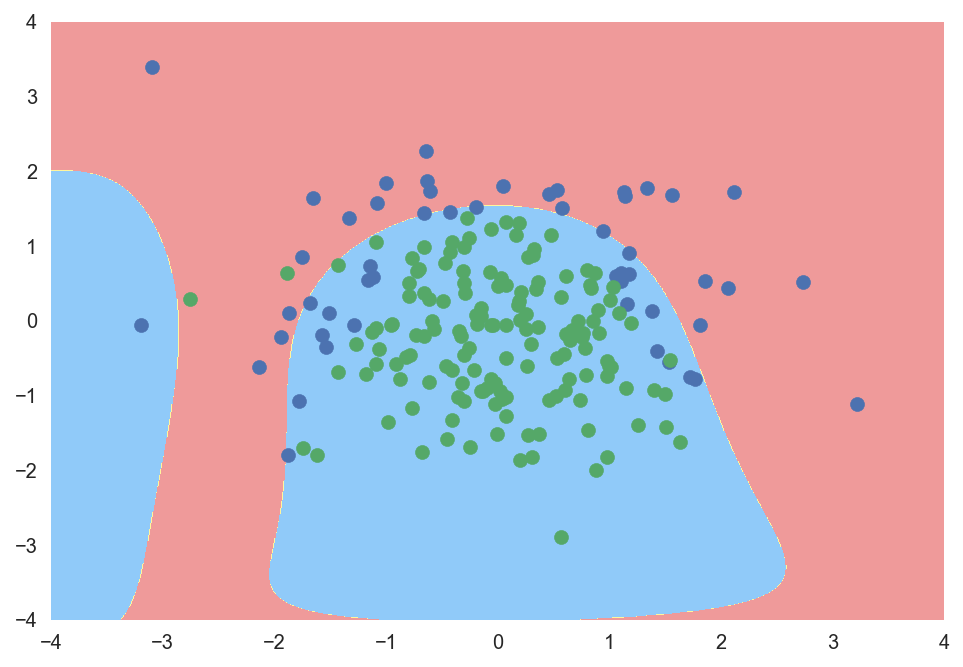

In [21]:
plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

可以看到，在模型较为复杂的情况下，加入了正则化的考虑以后，决策边界又变得规整起来。

## 看一下逻辑回归线性部分的权重列表

In [22]:
poly_log_reg3.get_params('log_reg')['log_reg'].coef_

array([[ 0.00000000e+00,  1.31532938e-02, -5.94850489e-01,
        -9.98228059e-01, -1.17465742e-01, -2.98621285e-01,
        -1.10920688e-01, -9.69659549e-02,  1.03313301e-01,
        -4.32751367e-01, -2.45903330e-01, -8.62938145e-02,
        -1.31368874e-01,  2.02377182e-02, -1.62881339e-01,
        -1.80731612e-01,  4.22335833e-02,  4.55016794e-02,
        -7.32970120e-02,  5.72623338e-02, -1.58013048e-01,
         1.85147977e-02, -3.53595617e-02, -6.14305284e-02,
         1.79486106e-02, -4.60207148e-02,  2.98649408e-02,
        -7.35321615e-02, -1.80189946e-01,  3.21529629e-02,
         3.10381814e-02, -3.12201247e-02,  3.57376576e-02,
        -4.01948457e-02,  3.65445419e-02, -6.34864187e-02,
         7.60677006e-02, -6.98881561e-03, -4.26441112e-02,
         2.47488847e-02, -3.43687577e-02,  2.67655437e-02,
        -3.34461683e-02,  3.03238477e-02, -4.39422573e-02,
        -1.55325773e-01,  1.69779816e-02,  2.58572872e-02,
        -2.71215635e-02,  3.14043042e-02, -3.02384763e-0

## 使用 L1 正则化

In [23]:
def PolynomialLogisticRegression(degree, C, penalty='l2'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty))
    ])


poly_log_reg4 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l1')
poly_log_reg4.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


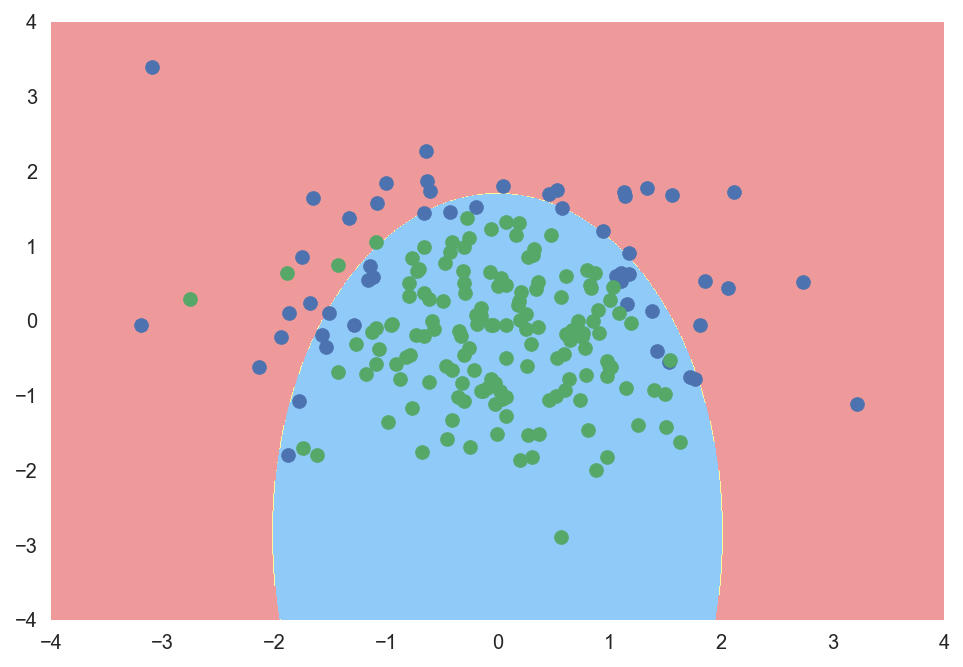

In [24]:
plot_decision_boundary(poly_log_reg4, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

可以看到，升维以后，特征变多了。

## L1 正则化有特征选择的功能，因此权重参数很多都是 0

In [25]:
poly_log_reg4.get_params('log_reg')['log_reg'].coef_

array([[ 0.        ,  0.        , -0.80150388, -1.194665  ,  0.        ,
        -0.19841471,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

可以看到 L1 正则化，因为具有特征选择的功能，所以会让特征数量大大减少。

**在实际的应用中，还应该使用网络搜索的方式，找到最适合的超参数。**  
**在实际的应用中，还应该使用网络搜索的方式，找到最适合的超参数。**  
**在实际的应用中，还应该使用网络搜索的方式，找到最适合的超参数。**  